In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import quad
import numpy as np
import corner
import emcee

In [2]:
N =1000
z =np.linspace(0,5,N) 
z

array([0.        , 0.00500501, 0.01001001, 0.01501502, 0.02002002,
       0.02502503, 0.03003003, 0.03503504, 0.04004004, 0.04504505,
       0.05005005, 0.05505506, 0.06006006, 0.06506507, 0.07007007,
       0.07507508, 0.08008008, 0.08508509, 0.09009009, 0.0950951 ,
       0.1001001 , 0.10510511, 0.11011011, 0.11511512, 0.12012012,
       0.12512513, 0.13013013, 0.13513514, 0.14014014, 0.14514515,
       0.15015015, 0.15515516, 0.16016016, 0.16516517, 0.17017017,
       0.17517518, 0.18018018, 0.18518519, 0.19019019, 0.1951952 ,
       0.2002002 , 0.20520521, 0.21021021, 0.21521522, 0.22022022,
       0.22522523, 0.23023023, 0.23523524, 0.24024024, 0.24524525,
       0.25025025, 0.25525526, 0.26026026, 0.26526527, 0.27027027,
       0.27527528, 0.28028028, 0.28528529, 0.29029029, 0.2952953 ,
       0.3003003 , 0.30530531, 0.31031031, 0.31531532, 0.32032032,
       0.32532533, 0.33033033, 0.33533534, 0.34034034, 0.34534535,
       0.35035035, 0.35535536, 0.36036036, 0.36536537, 0.37037

In [3]:
def R(z):
    if z <= 1.:
        return 1+2*z
    if z>1 and z<5:
        return (3./4.)*(5 - z)
    if z>=5:
        return 0.0
R(3.6)

1.0499999999999998

In [4]:
# valores em Hz^-1
MPC = 1.0293*10**(14)
M_solar = 4.92535*10**(-6)
# H0 em Hz
h=0.6876
H0=(h/3000.)*(1./MPC)
H0

2.226756047799475e-18

In [5]:
Om_mat = 0.3265
w0 = -1.087
lamb1 = 0.03798
def DC(zz):

        E = lambda zz :  np.sqrt((Om_mat + (lamb1/(lamb1 + w0))*(1-Om_mat))*(1+zz)**3 + (w0/(w0+lamb1))*(1-Om_mat)*(1+zz)**(3*(1+lamb1+w0)))**(-1) 
        result = quad(E, 0, zz)[0]
        return result

In [6]:
def E(z): 
    return np.sqrt((Om_mat + (lamb1/(lamb1 + w0))*(1-Om_mat))*(1+z)**3 + (w0/(w0+lamb1))*(1-Om_mat)*(1+z)**(3*(1+lamb1+w0)))
E(2.4)

3.529489919621293

In [7]:
def Psquare(z):
    return (4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
Psquare(2.2)

17.56671078575365

In [8]:
Norm = quad(Psquare,0,5)[0]
(1./np.sqrt(Norm))

0.12649573441976722

In [9]:
def P(z):
    return (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
P(2.1)

0.5639111289881181

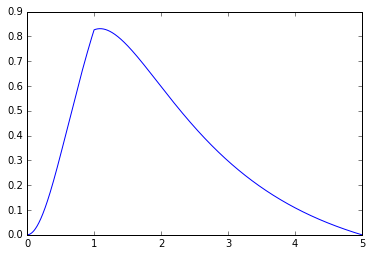

In [10]:
P = (1./np.sqrt(Norm))*np.array([(4.*np.pi*(DC(Z))**(2)*R(Z))*(1+Z)**(-1)*E(Z)**(-1) for Z in z])
plt.plot(z, P)
plt.show()

In [11]:
def P_CDF(z):
    P = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
    result = quad(P, 0, z)[0]
    return result

P_CDF(4.7)

1.7763551642404394

In [12]:
def P_CDFSquare(z):
    PSquare = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
    result = quad(PSquare, 0, z)[0]
    return result

P_CDFSquare(4.7)

7.904867673095994

In [13]:
Norm_CDF = quad(P_CDFSquare,0,5)[0]
Norm_CDF

26.90274513635051

In [14]:
from scipy import interpolate
CDF_P = np.vectorize(P_CDF)
CDF_P(z)

array([0.00000000e+00, 6.64790657e-08, 5.32176631e-07, 1.79715248e-06,
       4.26217550e-06, 8.32850001e-06, 1.43976485e-05, 2.28712004e-05,
       3.41505874e-05, 4.86368944e-05, 6.67306667e-05, 8.88317228e-05,
       1.15338973e-04, 1.46650245e-04, 1.83162111e-04, 2.25269727e-04,
       2.73366671e-04, 3.27844789e-04, 3.89094049e-04, 4.57502394e-04,
       5.33455607e-04, 6.17337177e-04, 7.09528166e-04, 8.10407091e-04,
       9.20349805e-04, 1.03972938e-03, 1.16891598e-03, 1.30827681e-03,
       1.45817595e-03, 1.61897429e-03, 1.79102943e-03, 1.97469561e-03,
       2.17032361e-03, 2.37826065e-03, 2.59885035e-03, 2.83243265e-03,
       3.07934370e-03, 3.33991587e-03, 3.61447761e-03, 3.90335345e-03,
       4.20686391e-03, 4.52532545e-03, 4.85905047e-03, 5.20834718e-03,
       5.57351964e-03, 5.95486768e-03, 6.35268687e-03, 6.76726846e-03,
       7.19889943e-03, 7.64786237e-03, 8.11443550e-03, 8.59889267e-03,
       9.10150328e-03, 9.62253231e-03, 1.01622403e-02, 1.07208833e-02,
      

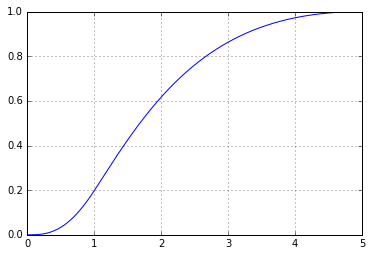

In [15]:
plt.plot(z, (1/np.amax(CDF_P(z)))*CDF_P(z))
plt.grid(True)
plt.show()

In [16]:
CDF_rand = np.sort(np.random.uniform(0,1, N))
CDF_rand

array([6.08579735e-04, 1.04613457e-03, 3.30754322e-03, 4.74451667e-03,
       5.41022428e-03, 5.82268595e-03, 7.18981554e-03, 7.94858339e-03,
       1.01489400e-02, 1.10148458e-02, 1.29632187e-02, 1.33860497e-02,
       1.79399102e-02, 1.81764120e-02, 1.83072510e-02, 1.89847495e-02,
       1.97967413e-02, 2.12276000e-02, 2.39505692e-02, 2.67028685e-02,
       2.72740935e-02, 2.79882079e-02, 3.05717923e-02, 3.09056916e-02,
       3.17761820e-02, 3.25915119e-02, 3.30801366e-02, 3.38150012e-02,
       3.45954013e-02, 3.50077124e-02, 3.51384940e-02, 3.53175875e-02,
       3.55097383e-02, 3.57354113e-02, 3.57547256e-02, 3.71214580e-02,
       3.77917643e-02, 3.89524434e-02, 3.99645184e-02, 4.05465182e-02,
       4.21752369e-02, 4.35658045e-02, 4.36938575e-02, 4.48265688e-02,
       4.58799080e-02, 4.60834795e-02, 4.84453626e-02, 4.84587734e-02,
       4.87645202e-02, 4.96356471e-02, 5.05430221e-02, 5.10717451e-02,
       5.11922724e-02, 5.16458602e-02, 5.72161052e-02, 5.81420074e-02,
      

In [17]:
z_fid = np.interp(CDF_rand, (1/np.amax(CDF_P(z)))*CDF_P(z),z)
z_fid

array([0.12681767, 0.15209417, 0.22435041, 0.25367949, 0.26534828,
       0.27209369, 0.29254316, 0.30283903, 0.32958267, 0.33909433,
       0.35891851, 0.36296932, 0.40235127, 0.40422235, 0.40525748,
       0.41050596, 0.41663945, 0.42710004, 0.44589995, 0.46362886,
       0.46717187, 0.47154182, 0.48681336, 0.48872946, 0.4936717 ,
       0.49822868, 0.50093491, 0.50495034, 0.50915611, 0.51136011,
       0.51205252, 0.51300071, 0.51401803, 0.51521283, 0.51531509,
       0.52241399, 0.52585052, 0.531703  , 0.53672835, 0.53958611,
       0.54745478, 0.55403958, 0.55464196, 0.55990932, 0.56473799,
       0.56566807, 0.57624401, 0.57630295, 0.57764681, 0.58146405,
       0.58540044, 0.5876671 , 0.58818326, 0.59012578, 0.61317357,
       0.61688427, 0.6208809 , 0.62438896, 0.63703127, 0.64014865,
       0.64047498, 0.64181665, 0.64993689, 0.65010089, 0.6570478 ,
       0.66500947, 0.66598959, 0.6740142 , 0.67431259, 0.67651992,
       0.67784492, 0.68545418, 0.69108929, 0.70357356, 0.70608

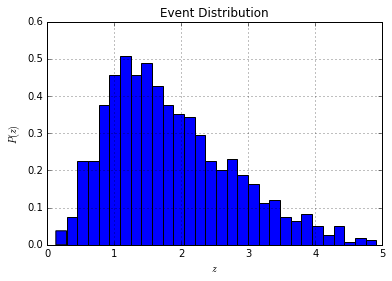

In [18]:
count, bins, ignored = plt.hist(z_fid, 30, normed=True)
#plt.plot(z, (0.6/np.amax(P))*P)
plt.grid(True)
plt.xlabel('$z$')
plt.ylabel('$P(z)$')
plt.title('Event Distribution')
plt.savefig('eventdistributionIM2A.png')
plt.show()

In [19]:
dl = np.array([(1 + Z)*DC(Z) for Z in z_fid])
dl

array([ 0.13909607,  0.16959167,  0.26141647,  0.30055437,  0.31641138,
        0.32565056,  0.3539804 ,  0.36842321,  0.40648621,  0.42021061,
        0.44912258,  0.4550808 ,  0.51387434,  0.5167061 ,  0.51827417,
        0.52624089,  0.53558476,  0.55160389,  0.58065346,  0.60834784,
        0.61391666,  0.62080079,  0.64499218,  0.64804197,  0.65592317,
        0.66320885,  0.66754405,  0.67398813,  0.68075248,  0.68430331,
        0.68541969,  0.68694914,  0.68859093,  0.69052028,  0.69068546,
        0.70217408,  0.70775083,  0.71727081,  0.72546796,  0.7301387 ,
        0.74303382,  0.75386355,  0.754856  ,  0.76354668,  0.77153302,
        0.77307345,  0.79063766,  0.7907358 ,  0.79297398,  0.79933926,
        0.80591506,  0.809707  ,  0.81057106,  0.81382465,  0.8526475 ,
        0.85893534,  0.8657191 ,  0.87168334,  0.89325194,  0.89858824,
        0.89914726,  0.9014464 ,  0.91538911,  0.91567119,  0.92763735,
        0.94139335,  0.94308985,  0.95700491,  0.95752319,  0.96

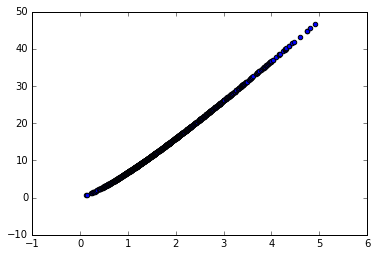

In [20]:
plt.scatter(z_fid, (h/3.)**(-1)*dl)
plt.show()

In [21]:
m = 5*np.log10((h/3000)**(-1)*dl)+25
m

array([38.91550117, 39.34594949, 40.28559167, 40.58854215, 40.70018739,
       40.7626861 , 40.94382298, 41.03066183, 41.24415604, 41.31626199,
       41.46075139, 41.48936948, 41.75321161, 41.76514486, 41.77172474,
       41.80484988, 41.84306799, 41.90706353, 42.01851204, 42.11968677,
       42.13947402, 42.16368823, 42.24669919, 42.25694259, 42.2831918 ,
       42.3071785 , 42.3213266 , 42.34218817, 42.36387311, 42.37517015,
       42.37870983, 42.38354985, 42.38873344, 42.39480911, 42.39532849,
       42.4311509 , 42.44832888, 42.47734273, 42.50201811, 42.51595377,
       42.55396984, 42.58539066, 42.5882475 , 42.6131049 , 42.63569951,
       42.64003072, 42.68881441, 42.68908393, 42.69522161, 42.71258265,
       42.7303733 , 42.74056641, 42.7428824 , 42.75158113, 42.85277456,
       42.86872929, 42.88581194, 42.90072065, 42.95379677, 42.9667306 ,
       42.96808107, 42.97362649, 43.00695565, 43.00762467, 43.03581808,
       43.06778257, 43.07169228, 43.10349776, 43.10467343, 43.11

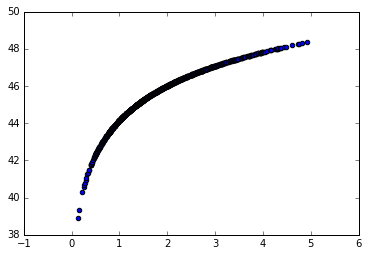

In [22]:
plt.scatter(z_fid, m)
plt.show()

In [23]:
q=0.03
N_BNS=(1/(1+q))*N
N_BHNS = N-int(N_BNS)
mass_1 =np.random.uniform(1,2, int(N_BNS))*M_solar
mass_2 = np.random.uniform(1,2, int(N_BNS))*M_solar
M_total1 = mass_1 + mass_2
eta1 =((mass_1*mass_2)/(M_total1**2))
M_chirp1 = M_total1*eta1**(3./5.)
#np.amax(mass_1/mass_2), np.amin(mass_1/mass_2)
mass_3 = np.random.uniform(1,2, N_BHNS)*M_solar
mass_4 = np.random.uniform(3,10, N_BHNS)*M_solar
M_total2 = mass_3+mass_4
eta2 =((mass_3*mass_4)/(M_total2**2))
M_chirp2 = M_total2*eta2**(3./5.)
M_total = np.concatenate((M_total1, M_total2), axis=None)
M_chirp = (1+z_fid)*np.concatenate((M_chirp1, M_chirp2), axis=None)
int(N_BNS)

970

In [24]:
phi_1 = np.random.uniform(0, 2*np.pi, N)
phi_2 = phi_1 + (2*np.pi/3.)
phi_3 = phi_1 + (4*np.pi/3.)
theta = np.random.uniform(0, np.pi, N)
psi = np.random.uniform(0, 2*np.pi, N)
F1_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.sin(2*psi))
F1_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.cos(2*psi))
Amp_1 = (H0/dl)*np.sqrt(4*F1_plus**2+4*F1_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)

In [25]:
# em Hz
f0 = 200
f_lower = 1.
M_obs = (1+z_fid)*M_total
f_LSO = (1./(6.**(3./2.)*2*np.pi*M_obs))
f_upper = 2*f_LSO
x_lower = f_lower/f0
x_upper = f_upper/f0
f = np.linspace(1,10**4, N)
x = f/f0
S0 = 1.449*10**(-52)
p1=-4.05
p2 = -0.69
a1 = 185.62
a2 = 232.56
b1=31.18
b2 = -64.72
b3 = 52.24
b4 = -42.16
b5 = 10.17
b6 = 11.53
c1 = 13.58
c2 = -36.46
c3 = 18.56
c4 = 27.43
def S_h(x):
    return S0*(x**p1 + a1*x**p2 + a2*((1+ b1*x + b2*x**2 + b3*x**3+b4*x**4 + b5*x**5 + b6*x**6)/(1 + c1*x + c2*x**2 + c3*x**3+c4*x**4)))
S_h(239)


8.097623759624806e-46

In [26]:
def h_1(x):
    return Amp_1*(f0*x)**(-7./6.)

In [27]:
rho_1 = np.zeros(len(Amp_1))
for i in range(len(Amp_1)):
    integ_H = lambda y: (4.*f0*(Amp_1[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_1[i] = np.sqrt(quad(integ_H, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_1

array([9.93231647e+01, 6.26754741e+01, 2.36835111e+01, 4.91713295e+01,
       1.37762486e+01, 2.59631857e+01, 2.66646071e+00, 9.12910113e+00,
       4.64083342e+01, 3.49949926e+01, 1.12267209e+00, 1.14724059e+01,
       4.26112041e+00, 1.09520222e-01, 3.30900183e+01, 2.38553635e+01,
       3.33732015e+01, 8.69105477e+00, 1.25252861e+00, 2.09463487e+01,
       5.67753195e+00, 1.49145524e+01, 4.67553816e+00, 1.80389765e+01,
       2.36479247e+01, 3.89733524e+00, 5.98703512e+00, 5.65447402e+00,
       1.31938234e+01, 1.77761077e+01, 1.38854872e+01, 5.85061412e+00,
       1.53325368e+01, 1.22349828e+01, 2.09697604e+01, 2.26970254e+00,
       2.80740021e+01, 1.21641895e+01, 1.88004453e+00, 4.70962521e+00,
       1.15463948e+01, 1.33610687e+01, 1.75524964e+01, 2.07532494e+01,
       9.04882610e+00, 1.64337251e+00, 1.33132626e+01, 1.70970649e+00,
       1.70611528e+01, 1.66698520e+01, 7.82928936e+00, 2.04526722e+01,
       8.66600440e+00, 1.33408487e+01, 7.42092003e-01, 1.96220158e+01,
      

In [28]:
F2_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.sin(2*psi))
F2_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.cos(2*psi))
Amp_2 = (H0/dl)*np.sqrt(4*F2_plus**2+4*F2_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)
def h_2(x):
    return Amp_2*(f0*x)**(-7./6.)

In [29]:
rho_2 = np.zeros(len(Amp_2))
for i in range(len(Amp_2)):
    integ_2 = lambda y: (4.*f0*(Amp_2[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_2[i] = np.sqrt(quad(integ_2, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_2

array([7.80382086e+01, 5.42169543e+01, 4.49029602e+00, 8.86680756e+00,
       1.44454752e+01, 7.58718423e+00, 2.15876069e+01, 4.33420127e+01,
       5.30067740e+01, 9.74893179e-01, 7.45082071e+00, 2.00914847e+01,
       1.84646258e+01, 2.14310696e+01, 7.37802250e+00, 2.85170113e+01,
       9.71168492e+00, 1.03694695e+01, 2.00066619e+01, 2.48319997e+00,
       2.87242584e+01, 3.21339464e+01, 2.30006650e+01, 5.35280818e+00,
       1.18165269e+01, 4.27455799e+00, 1.78104579e+01, 9.11972294e+00,
       1.50415525e+01, 6.63219241e-01, 3.02971899e+01, 2.11600780e+01,
       3.65691785e+00, 7.70153835e+00, 1.49103795e+00, 1.03652299e+01,
       1.51497142e+00, 4.28573857e+00, 2.90114122e-01, 1.53237217e+01,
       1.41972674e+01, 1.15491752e+00, 1.42456300e+01, 1.53403695e+01,
       4.64819963e+00, 6.54541700e-01, 1.01026690e+01, 1.84962438e+01,
       1.52564549e+01, 2.48795670e+01, 4.48665192e+00, 1.80196703e+01,
       1.95256358e+01, 3.72825172e+00, 1.38030560e+01, 3.05861208e+01,
      

In [30]:
F3_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.sin(2*psi))
F3_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.cos(2*psi))
Amp_3 = (H0/dl)*np.sqrt(4*F3_plus**2+4*F3_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)

In [31]:
def h_3(x):
    return Amp_3*(f0*x)**(-7./6.)

In [32]:
rho_3 = np.zeros(len(Amp_3))
for i in range(len(Amp_3)):
    integ_3 = lambda y: (4.*f0*(Amp_3[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_3[i] = np.sqrt(quad(integ_3, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_3

array([2.12849562e+01, 8.45851981e+00, 1.91932151e+01, 4.03045219e+01,
       2.82217239e+01, 3.35503700e+01, 2.42540676e+01, 5.24711138e+01,
       6.59843980e+00, 3.59698858e+01, 8.57349280e+00, 3.15638906e+01,
       1.42035054e+01, 2.13215493e+01, 2.57119958e+01, 4.66164777e+00,
       2.36615166e+01, 1.67841469e+00, 1.87541333e+01, 2.34295487e+01,
       2.30467265e+01, 1.72193940e+01, 2.76762032e+01, 1.26861684e+01,
       1.18313977e+01, 3.77222751e-01, 1.18234228e+01, 3.46524892e+00,
       1.84772902e+00, 1.71128885e+01, 1.64117027e+01, 2.70106921e+01,
       1.89894547e+01, 4.53344444e+00, 2.24607984e+01, 1.26349325e+01,
       2.65590307e+01, 7.87845097e+00, 2.17015865e+00, 1.06140965e+01,
       2.65087257e+00, 1.22061512e+01, 3.17981264e+01, 5.41287983e+00,
       4.40062647e+00, 2.29791420e+00, 3.21059358e+00, 1.67865373e+01,
       1.80469790e+00, 8.20971501e+00, 1.23159413e+01, 2.43300195e+00,
       1.08596314e+01, 9.61259693e+00, 1.45451480e+01, 1.09641050e+01,
      

In [33]:
rho_tot = np.sqrt(rho_1**2+rho_2**2+rho_3**2)
rho_tot[rho_tot < 8.0] = np.random.uniform(8., 20.)
rho_tot

array([128.09411541,  83.30209922,  30.8131622 ,  64.19419296,
        34.56765074,  43.09616807,  32.57905127,  68.66650082,
        70.76009454,  50.1939499 ,  11.41402211,  39.13518932,
        23.68204214,  30.2309643 ,  42.5498679 ,  37.47037848,
        42.04705429,  13.63368644,  27.45091738,  31.5255382 ,
        37.26216573,  39.38961683,  36.28861351,  22.69352545,
        28.96267636,  15.56294425,  22.20023259,  11.27609742,
        20.09326704,  24.68361435,  37.14929958,  34.80741405,
        24.6791232 ,  15.15125788,  30.76428954,  16.49942603,
        38.67592078,  15.11307552,  15.56294425,  19.22644168,
        18.49077497,  18.13400445,  39.01472725,  26.36898868,
        11.08388591,  15.56294425,  17.01807257,  25.03641274,
        22.9586429 ,  31.05279758,  15.2679477 ,  27.36676484,
        23.96417495,  16.86060863,  20.06580144,  37.95715854,
        21.18851992,  25.97539132,  32.51783448,  26.17440985,
        29.24994405,  23.03776978,  28.68024987,  15.56

In [34]:
sigma_dl = np.sqrt(((2*dl)/rho_tot)**2 + (0.05*z_fid*dl)**2)
np.amax(sigma_dl), np.amin(sigma_dl)

(3.227108477037438, 0.002344042358325306)

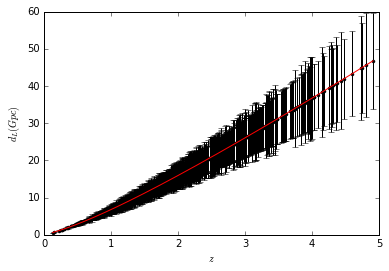

In [37]:
plt.errorbar(z_fid, (h/3.)**(-1)*dl, (h/3.)**(-1)*sigma_dl,  fmt=".k")
plt.plot(z_fid, (h/3)**(-1)*dl, 'r')
plt.xlabel('$z$')
plt.ylabel('$d_L(Gpc)$')
#plt.ylim((0,100))
plt.show()

In [38]:
m_err = (5./np.log(10))*(sigma_dl/dl)
np.amax(m_err), np.amin(m_err)

(0.6816578844584776, 0.03659358211005128)

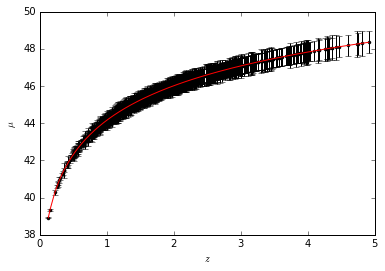

In [39]:
plt.errorbar(z_fid, m, m_err, fmt='.k')
plt.plot(z_fid, m, 'r')
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

In [42]:
dl_fid = np.sqrt((np.random.normal(dl, sigma_dl))**2)
#dl = np.array([(1 + Z)*DC(Z) for Z in z_eff]) + np.random.normal(0, sigma_dl, N)
np.amin(dl_fid), np.amax(dl_fid)

(0.13845235446687246, 14.475665376424729)

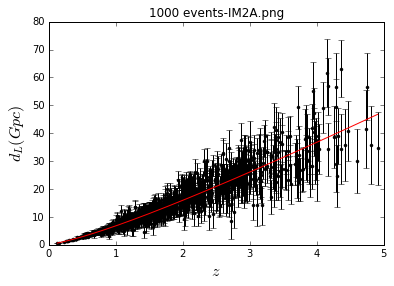

In [46]:
plt.errorbar(z_fid, (h/3.)**(-1)*dl_fid, (h/3.)**(-1)*sigma_dl,  fmt=".k")
plt.plot(z_fid,(h/3.)**(-1)*dl, 'r' )
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$d_L(Gpc)$', fontsize=16)
plt.savefig('dL(z)-1000vents_IM2A')
#plt.ylim((0,400))
plt.title('1000 events-IM2A.png')
plt.show()

In [44]:
m_fid = np.random.normal(m, m_err, N)
#mu = 5*np.log10((h/3000)**(-1)*dl)+25
np.amax(m_fid), np.amin(m_fid)
#len(mu_fid)/

(49.207751236245144, 38.951426069278206)

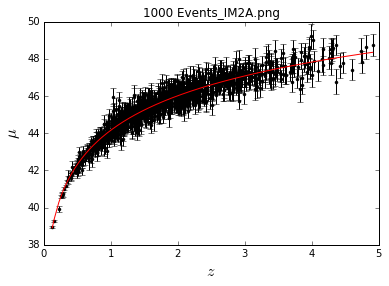

In [47]:
plt.errorbar(z_fid, m_fid, m_err, fmt='.k')
plt.plot(z_fid, m, 'r')
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$\mu$', fontsize=16)
plt.savefig('mu(z)-1000Events-IM2A')
#plt.ylim((40,55))
plt.title('1000 Events_IM2A.png')
plt.show()

In [54]:
#definir likelihood
c=3.e5
def lnlike(theta, z_fid, m_fid, m_err):
    Om_m, H_0, w, lamb = theta
    def DL(zz, Om_m, H_0, w, lamb):

        E = lambda zz :  np.sqrt((Om_m + (lamb/(lamb + w))*(1-Om_m))*(1+zz)**3 + (w/(w+lamb))*(1-Om_m)*(1+zz)**(3*(1+lamb+w)))**(-1)
        result = quad(E, 0, zz)[0]
        return result

    dl = (c/H_0)*np.array([(1 + Z) * DL(Z, Om_m, H_0, w, lamb) for Z in z_fid])
    

    mu = 5*np.log10(dl)+25
    
    result = -0.5 * np.sum((m_fid-mu)**2/m_err**2)
    # print result 
    return result

In [55]:
#priors

def lnprior(theta):
    Om_m, H_0, w, lamb = theta
    if 0.0 <= Om_m <= 1.0  and 20.0 <= H_0 <= 100.0 and -2.5 <= w <= -1.01 and -0.3 <= lamb <= 0.3:
        return 0.0
    return -np.inf


In [56]:
#posterior

def lnprob(theta, z_fid, m_fid, m_err):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, z_fid, m_fid, m_err)

In [57]:
#cadeia de Markov

set_ini = 0.3, 70.0, -1.01, 0.1 

ndim, nwalkers = 4, 16
pos = [set_ini + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(z_fid, m_fid, m_err))
sampler.run_mcmc(pos, 7000, progress=True)

samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

np.savetxt("chainInt2a_500events.txt",samples)

  0%|          | 0/7000 [00:00<?, ?it/s]/home/riisrhavia/.local/lib/python2.7/site-packages/emcee/moves/red_blue.py:97: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 7000/7000 [1:46:51<00:00,  1.19it/s]


In [58]:
Om_m_mcmc, H_0_mcmc, w_mcmc, lamb_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [59]:
Om_m_mcmc, H_0_mcmc, w_mcmc, lamb_mcmc

((0.35151744872870316, 0.069999459283134, 0.10268500499348382),
 (69.61735278480688, 1.5213323569579842, 1.438295012572837),
 (-1.2026611698349423, 0.13438378942457163, 0.2201468417397956),
 (0.08081417280544627, 0.14726757174274624, 0.19179677627584107))

/home/riisrhavia/.local/lib/python2.7/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/riisrhavia/.local/lib/python2.7/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


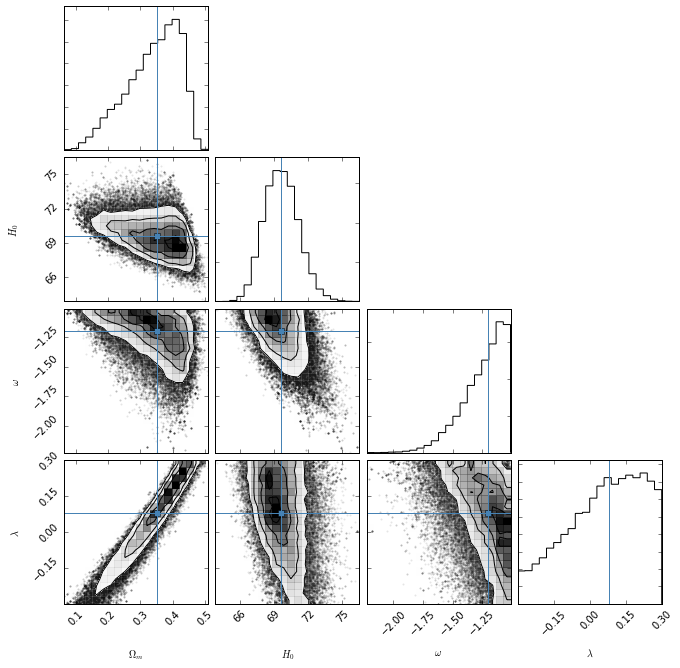

In [60]:
fig = corner.corner(samples, labels=["$\Omega_m$", "$H_0$", "$\omega$", "$\lambda$"],
                    truths=[Om_m_mcmc[0], H_0_mcmc[0], w_mcmc[0], lamb_mcmc[0]])
fig.savefig("ParametersIm2a_500.png")
fig.show()

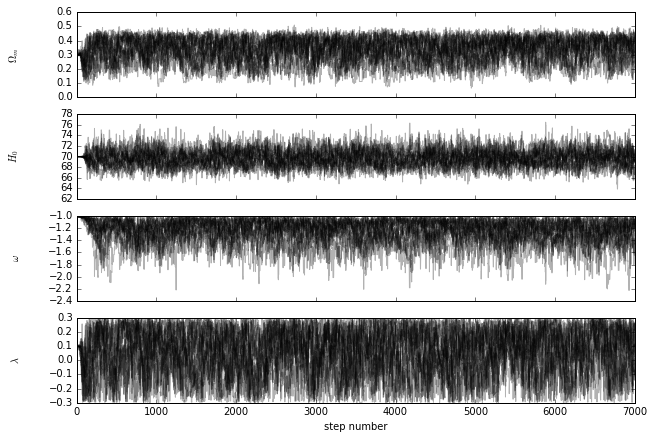

In [61]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$\Omega_m$", "$H_0$", "$\omega$", "$\lambda$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [62]:
tau = sampler.get_autocorr_time()
print(tau)

[79.99105598 62.60160437 84.15156642 77.29763173]


In [63]:
50*79.99105598, 50*62.60160437, 50*84.15156642, 50*77.29763173

(3999.552799, 3130.0802185, 4207.578321, 3864.8815865)

In [48]:
np.savetxt('SS_1000.txt', np.transpose([z_fid, m_fid, m_err]))